In [1]:
# code 10-1
import pandas as pd
df = pd.read_csv('../datafiles/bike.tsv')
df.head()

,dteday\tholiday\tweekday\tworkingday\tweather_id\tcnt
0,2011-01-01\t0\t6\t0\t2\t985
1,2011-01-02\t0\t0\t0\t2\t801
2,2011-01-03\t0\t1\t1\t1\t1349
3,2011-01-04\t0\t2\t1\t1\t1562
4,2011-01-05\t0\t3\t1\t1\t1600


In [7]:
# code 10-2
df = pd.read_csv('../datafiles/bike.tsv',sep="\t")
df.head()

,dteday,holiday,weekday,workingday,weather_id,cnt
0,2011-01-01,0,6,0,2,985
1,2011-01-02,0,0,0,2,801
2,2011-01-03,0,1,1,1,1349
3,2011-01-04,0,2,1,1,1562
4,2011-01-05,0,3,1,1,1600


In [3]:
# df2=pd.read_csv("../datafiles/weather.csv")

In [8]:
# code 10-4
weather = pd.read_csv("../datafiles/weather.csv",encoding="shift-jis")
# weather = pd.read_csv("../datafiles/weather.csv",encoding="cp932") # MSのエンコード名
weather

,weather_id,weather
0,1,晴れ
1,2,曇り
2,3,雨


In [9]:
# code 10-5
temp= pd.read_json("../datafiles/temp.json")
temp.head(2)

,0,1,2,3,4,5,6,7,8,9,...,720,721,722,723,724,725,726,727,728,729
atemp,0.363625,0.353739,0.189405,0.212122,0.22927,0.233209,0.208839,0.162254,0.116175,0.150888,...,0.236113,0.259471,0.2589,0.294465,0.220333,0.226642,0.255046,0.2424,0.2317,0.223487
dteday,2011-01-01,2011-01-02,2011-01-03,2011-01-04,2011-01-05,2011-01-06,2011-01-07,2011-01-08,2011-01-09,2011-01-10,...,2012-12-22,2012-12-23,2012-12-24,2012-12-25,2012-12-26,2012-12-27,2012-12-28,2012-12-29,2012-12-30,2012-12-31


In [10]:
# code 10-6
temp.T

,atemp,dteday,hum,temp,windspeed
0,0.363625,2011-01-01,0.805833,0.344167,0.160446
1,0.353739,2011-01-02,0.696087,0.363478,0.248539
2,0.189405,2011-01-03,0.437273,0.196364,0.248309
3,0.212122,2011-01-04,0.590435,0.2,0.160296
4,0.22927,2011-01-05,0.436957,0.226957,0.1869
...,...,...,...,...,...
725,0.226642,2012-12-27,0.652917,0.254167,0.350133
726,0.255046,2012-12-28,0.59,0.253333,0.155471
727,0.2424,2012-12-29,0.752917,0.253333,0.124383
728,0.2317,2012-12-30,0.483333,0.255833,0.350754


In [14]:
# code 10-7
df2=df.merge(weather,how="inner",on="weather_id")
# 内部結合後は、行が順不同の可能性があるので並び替えを行う
df2 = df2.sort_values(by="dteday")
df2.head()

,dteday,holiday,weekday,workingday,weather_id,cnt,weather
0,2011-01-01,0,6,0,2,985,曇り
1,2011-01-02,0,0,0,2,801,曇り
247,2011-01-03,0,1,1,1,1349,晴れ
248,2011-01-04,0,2,1,1,1562,晴れ
249,2011-01-05,0,3,1,1,1600,晴れ


In [16]:
# code 10-8
df2.groupby("weather").mean(numeric_only=True)['cnt']

weather
晴れ    4876.786177
曇り    4052.672065
雨     1803.285714
Name: cnt, dtype: float64

In [17]:
# code 10-9
temp=temp.T
temp.loc[199:201]

,atemp,dteday,hum,temp,windspeed
199,0.747479,2011-07-19,0.650417,0.776667,0.1306
200,0.826371,2011-07-21,0.69125,0.815,0.222021
201,None,2011-07-22,0.580417,0.848333,0.1331


In [18]:
# code 10-10
df2[df2['dteday']=='2011-07-20']

,dteday,holiday,weekday,workingday,weather_id,cnt,weather
370,2011-07-20,0,3,1,1,4332,晴れ


In [30]:
# code 10-11
df3 = df2.merge(temp,how="left",on="dteday")
df3[df3["dteday"]=='2011-07-20']

,dteday,holiday,weekday,workingday,weather_id,cnt,weather,atemp,hum,temp,windspeed
200,2011-07-20,0,3,1,1,4332,晴れ,NaN,NaN,NaN,NaN


<Axes: >

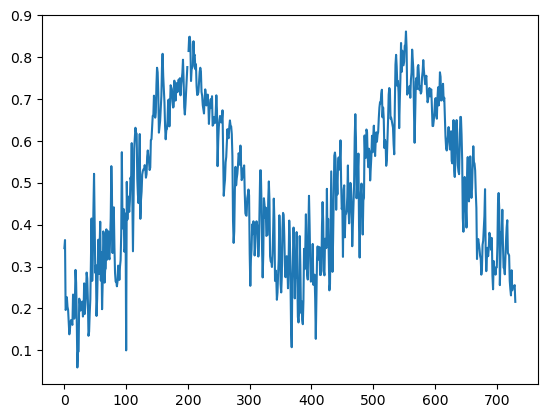

In [31]:
# code 10-12
%matplotlib inline
df3["temp"].plot()


In [32]:
# df3

<Axes: >

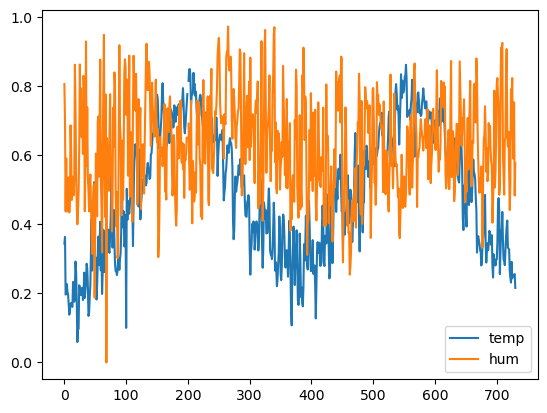

In [33]:
# code 10-13
df3[["temp","hum"]].plot()


<Axes: ylabel='Frequency'>

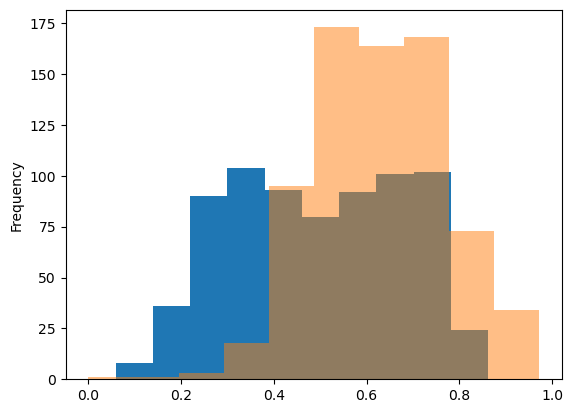

In [34]:
# code 10-14
df3["temp"].plot(kind="hist")
df3["hum"].plot(kind="hist",alpha=0.5)


<Axes: >

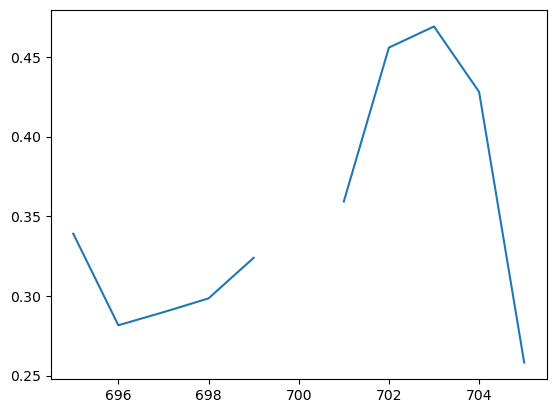

In [35]:
# code 10-15
# df3['atemp'].loc[220:240].plot(kind='line')
df3['atemp'].loc[695:705].plot(kind='line')

In [39]:
atp = df3['atemp']

In [40]:
type(atp[0])

numpy.float64

<Axes: >

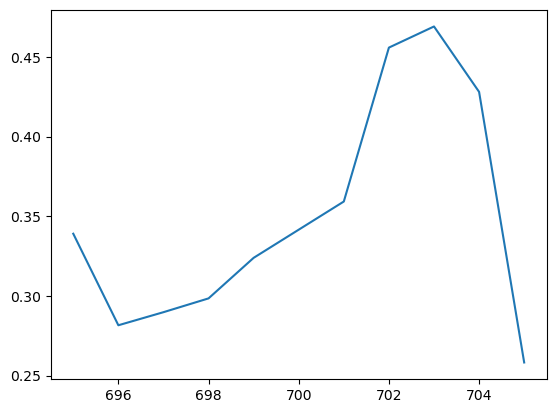

In [38]:
# code 10-16
#atemp列のdtypeをfloatに変換
df3["atemp"] = df3["atemp"].astype(float)


df3["atemp"] =df3["atemp"].interpolate()
df3.loc[695:705,"atemp"].plot()

In [52]:
# code 10-17
iris_df = pd.read_csv('../datafiles/iris.csv')
non_df = iris_df.dropna() # 欠損値を含む行を削除


from sklearn.linear_model import LinearRegression
x = non_df.loc[:,"がく片幅":"花弁幅" ]
t = non_df['がく片長さ']
model = LinearRegression()
model.fit(x,t) # 欠損値予測のためのモデルを予測

LinearRegression()

In [53]:
# code 10-18
# 欠損行の抜き出し
condition = iris_df['がく片長さ'].isnull()
non_data = iris_df.loc[ condition ]


# 欠損行の入力に利用する特徴量だけを抜き出して、モデルで予測
x = non_data.loc[:,"がく片幅":"花弁幅"]
pred = model.predict(x)


# 欠損行のがく片長さ(cm)のマスを抜き出して、predで代入
iris_df.loc[condition,'がく片長さ']=pred

In [54]:
condition.sum()

2

In [56]:
non_data

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
61,NaN,0.42,0.65,0.58,Iris-versicolor
137,NaN,0.46,0.57,0.71,Iris-virginica


In [47]:
pred

array([0.50543104, 0.572684  ])

In [57]:
iris_df.loc[59:62]

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
59,0.250000,0.29,0.60,0.54,Iris-versicolor
60,0.190000,0.00,0.30,0.38,Iris-versicolor
61,0.505431,0.42,0.65,0.58,Iris-versicolor
62,0.470000,0.08,0.32,0.38,Iris-versicolor


In [50]:
iris_df.loc[135:139]

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
135,0.940000,0.42,NaN,0.92,Iris-virginica
136,0.560000,0.58,0.80,0.96,Iris-virginica
137,0.572684,0.46,0.57,0.71,Iris-virginica
138,0.470000,0.42,0.40,0.71,Iris-virginica
139,0.720000,0.46,0.71,0.83,Iris-virginica


In [58]:
# code 10-19
from sklearn.covariance import MinCovDet

#数値列を適当に取り出す
df4=df3.loc[:,"atemp":"windspeed"]
df4=df4.dropna()#欠損値を削除

#df4に対して、各データの中心点からのマハラノビス距離を計算

mcd = MinCovDet(random_state=0,support_fraction=0.7)
mcd.fit(df4)
#マハラノビス距離
distance = mcd.mahalanobis(df4)
distance


array([5.28685919e+00, 2.93958299e+00, 1.08873903e+01, 3.91777267e+00,
       5.83743181e+00, 6.85979161e+00, 4.57807325e+00, 1.12294313e+01,
       3.07879561e+01, 1.07350024e+01, 4.93484073e+00, 1.74968772e+01,
       1.87331329e+01, 5.32729180e+00, 3.61541859e+00, 4.80173345e+00,
       8.21213444e+00, 6.79836643e+00, 2.87299048e+00, 5.25717722e+00,
       2.34832751e+01, 1.17927956e+01, 1.49622820e+01, 8.00089913e+00,
       3.82116490e+00, 2.10012092e+01, 4.47041230e+00, 5.45651259e+00,
       3.90883119e+00, 7.18467288e+00, 6.26114495e+00, 1.11698504e+01,
       8.91683812e+00, 1.31862666e+01, 3.78816752e+00, 9.40980352e+00,
       2.37017046e+00, 9.05455392e+00, 2.15907661e+01, 8.24295918e+00,
       9.58859635e+00, 5.84834138e+00, 3.26204050e+00, 4.28450181e+00,
       1.48613074e+01, 1.14032754e+01, 4.13782899e+00, 1.84042916e+00,
       4.70582846e+00, 3.26061846e+01, 5.97687800e+00, 1.00266113e+01,
       6.60674933e+00, 8.23738671e+00, 4.97949164e+00, 9.40472950e+00,
      

<Axes: >

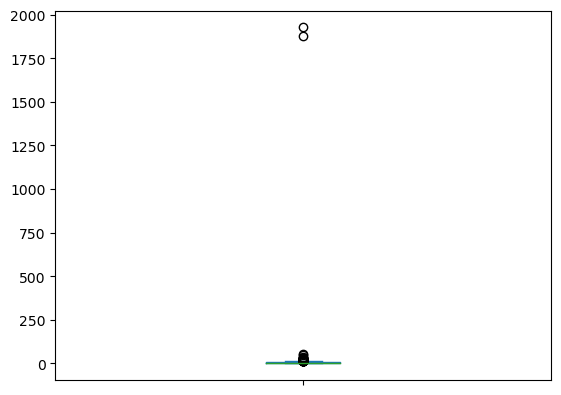

In [59]:
# code 10-20
distance=pd.Series(distance)
distance.plot(kind="box")

In [60]:
# code 10-21
tmp=distance.describe()#様々な基本統計量を計算
tmp

count     730.000000
mean       10.627559
std        99.403456
min         0.187189
25%         2.311196
50%         3.802735
75%         6.554506
max      1927.352267
dtype: float64

In [61]:
# code 10-22
IQR = tmp['75%'] -tmp['25%']#IQR計算
jougen = 1.5*(IQR) + tmp['75%'] # 上限値
kagen = tmp['25%'] -1.5*(IQR) # 下限値

# 上限と下限の条件をもとに、シリーズで条件検索
outliner = distance[ (distance > jougen) | (distance < kagen) ]
outliner

8        30.787956
11       17.496877
12       18.733133
20       23.483275
22       14.962282
25       21.001209
33       13.186267
38       21.590766
44       14.861307
49       32.606185
64       16.674029
65       16.809630
68       25.037268
77       13.417109
89       14.423018
100    1927.352267
105      13.166850
200      55.610638
201      14.164660
206      13.194839
237      15.210330
248      14.082230
249      27.571029
250      19.025119
263      23.080048
264      45.737514
266      15.769188
268      13.735069
291      16.174853
300      30.115803
365      14.522407
366      30.771500
376      18.737756
381      21.123075
384      12.979329
385      13.452365
405      15.068717
406      38.771470
419      27.244647
431      23.912297
432      14.113163
463      13.001305
471      13.608394
593    1878.348913
625      18.385930
665      13.941376
666      15.629783
692      21.351284
699      15.388077
719      14.674746
720      24.727324
724      23.899808
725      22.

# 演習問題

In [119]:
# code 10-1
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline

In [120]:
# code 10-2
df = pd.read_csv('../datafiles/Bank.csv')
print(df.shape)
df.head()

(27128, 16)


,id,age,job,marital,education,default,amount,housing,loan,contact,day,month,duration,campaign,previous,y
0,1,39,blue-collar,married,secondary,no,1756.0,yes,no,cellular,3,apr,370.055237,1,0,1
1,2,51,entrepreneur,married,primary,no,1443.0,no,no,cellular,18,feb,233.998933,10,0,1
2,3,36,management,single,tertiary,no,436.0,no,no,cellular,13,apr,NaN,1,2,0
3,4,63,retired,married,secondary,no,474.0,no,no,cellular,25,jan,252.525808,1,0,0
4,5,31,management,single,tertiary,no,354.0,no,no,cellular,30,apr,NaN,1,2,0


In [121]:
# code 10-3
# まず、ダミー変数化をしたいが、文字列の列が複数あるので抜き出す。
str_col_name=['job','default','marital','education','housing','loan','contact','month']
str_df = df[str_col_name]
#複数列を一気にダミー変数化
str_df2=pd.get_dummies(str_df,drop_first=True, dtype=int)

num_df = df.drop(str_col_name,axis=1)#数値列を抜き出す
df2 = pd.concat([num_df,str_df2,str_df],axis=1)#結合(今後の集計の利便性も考慮してstr_dfも結合しておく)

In [122]:
# code 10-4
#訓練&検証データとテストデータに分割
train_val,test = train_test_split(df2,test_size=0.1,random_state=9)
train_val.head()

,id,age,amount,day,duration,campaign,previous,y,job_blue-collar,job_entrepreneur,...,month_oct,month_sep,job,default,marital,education,housing,loan,contact,month
13378,13379,46,0.0,10,378.293875,1,0,1,0,0,...,0,0,unemployed,no,married,tertiary,yes,no,cellular,jul
3800,3801,41,-333.0,30,300.845752,3,2,0,1,0,...,0,0,blue-collar,no,divorced,secondary,yes,no,cellular,jan
10398,10399,30,5389.0,6,159.053623,3,0,1,0,0,...,0,0,management,no,single,tertiary,no,no,cellular,aug
23401,23402,39,255.0,5,334.802583,1,0,0,0,0,...,0,0,management,no,single,tertiary,yes,no,sending _document,may
26223,26224,47,33.0,5,NaN,1,0,1,0,0,...,0,0,services,no,single,secondary,yes,no,cellular,may


In [123]:
# code 10-5
#欠損値の確認
is_nan=train_val.isnull().sum()
#欠損が存在している列だけ表示
is_nan[is_nan>0]

duration    6331
dtype: int64

# 改善案1  欠損値の補完方法を線形回帰で行ってみる。

In [125]:
# code 10-6
# train_val.loc[:,:'month_sep'].corr()['duration'].map(abs).sort_values(ascending=False)
train_val.drop(str_col_name, axis=1).corr()['duration'].map(abs).sort_values(ascending=False)

duration                     1.000000
housing_yes                  0.556899
loan_yes                     0.372579
y                            0.277575
age                          0.207738
month_aug                    0.187310
month_may                    0.184593
marital_single               0.164614
previous                     0.143538
marital_married              0.115429
job_student                  0.107913
contact_sending _document    0.087863
education_tertiary           0.081769
job_blue-collar              0.080727
month_jun                    0.065998
month_oct                    0.052855
job_unknown                  0.046328
job_management               0.045735
job_unemployed               0.044179
month_mar                    0.043775
job_housemaid                0.039184
education_secondary          0.033989
job_retired                  0.033277
month_sep                    0.032082
amount                       0.030532
day                          0.023779
job_services

In [127]:
# code 10-7
#特徴量の当たりがついた
#しかし、そもそもこの線形回帰は外れ値の影響を強く受けるので調べる。
num_df=train_val.drop(str_col_name,axis=1)
num_df=num_df.drop('id',axis=1)
num_df2=num_df.dropna()
mcd2 =MinCovDet(random_state=0,support_fraction=0.7)
mcd2.fit(num_df2)

MinCovDet(random_state=0, support_fraction=0.7)

<Axes: >

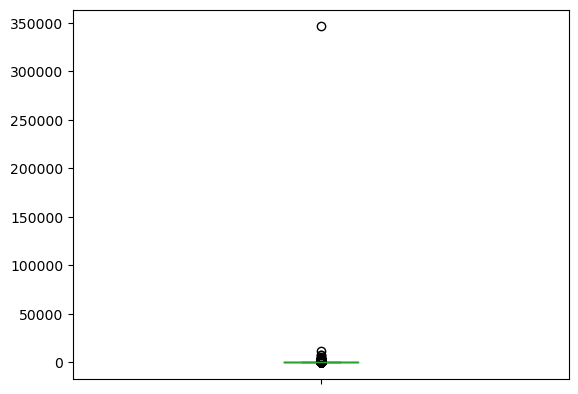

In [128]:
# code 10-8
dis =mcd2.mahalanobis(num_df2)
dis=pd.Series(dis)
dis.plot(kind="box")

In [129]:
# code 10-9
print(dis[0:3])#先頭は0番からのラベル
no=dis[dis>300000].index
no[0]

0    30.914718
1    78.512220
2    32.620429
dtype: float64


2561

In [130]:
# code 10-10
#先頭から2561番目が外れ値となる事が分かったので９章の付録で紹介したilocを利用する
no=num_df2.iloc[no[0]:(no[0]+1),:].index
train_val2 = train_val.drop(no)

In [131]:
no

Index([3140], dtype='int64')

In [132]:
train_val[train_val.index==3140]

,id,age,amount,day,duration,campaign,previous,y,job_blue-collar,job_entrepreneur,...,month_oct,month_sep,job,default,marital,education,housing,loan,contact,month
3140,3141,40,543.0,2,1435.48804,2,275,0,0,0,...,0,0,management,no,married,tertiary,yes,no,cellular,feb


In [134]:
train_val.shape, train_val2.shape

((24415, 48), (24414, 48))

In [135]:
# code 10-11
# train_val2.loc[:,:'month_sep'].corr()['duration'].map(abs).sort_values(ascending=False)
train_val.drop(str_col_name, axis=1).corr()['duration'].map(abs).sort_values(ascending=False)

duration                     1.000000
housing_yes                  0.556899
loan_yes                     0.372579
y                            0.277575
age                          0.207738
month_aug                    0.187310
month_may                    0.184593
marital_single               0.164614
previous                     0.143538
marital_married              0.115429
job_student                  0.107913
contact_sending _document    0.087863
education_tertiary           0.081769
job_blue-collar              0.080727
month_jun                    0.065998
month_oct                    0.052855
job_unknown                  0.046328
job_management               0.045735
job_unemployed               0.044179
month_mar                    0.043775
job_housemaid                0.039184
education_secondary          0.033989
job_retired                  0.033277
month_sep                    0.032082
amount                       0.030532
day                          0.023779
job_services

In [97]:
#monthはdurationに本質的に影響あるとは思えないので特徴量を
#housing_yes ,loan_yes,age,marital_single ,job_student    とする。（ｙは最終的な正解データなので除外）    

In [136]:
# code 10-12
#欠損行を削除
not_nan_df = train_val2.dropna()
temp_t =not_nan_df['duration']
temp_x = not_nan_df[['housing_yes','loan_yes','age','marital_single' ,'job_student']]
# 線形回帰
from sklearn.linear_model import LinearRegression
model_liner = LinearRegression()

a,b,c,d= train_test_split(temp_x,temp_t,random_state=0,test_size=0.2)

#今回は予測させたいだけなので、標準化はしない
model_liner.fit(a,c)
print(model_liner.score(a,c),model_liner.score(b,d))

0.7271253237617876 0.7154980171805083


In [137]:
# code 10-13
# コード修正(不要なので削除)
# tain_val2 = train_val.copy()

is_null=train_val2['duration'].isnull()
non_x=train_val2.loc[is_null,['housing_yes','loan_yes','age','marital_single','job_student']]
pred_d = model_liner.predict(non_x)
train_val2.loc[is_null,'duration']=pred_d

In [139]:
train_val2.isnull().sum().head(1)

id    0
dtype: int64

<Axes: ylabel='Frequency'>

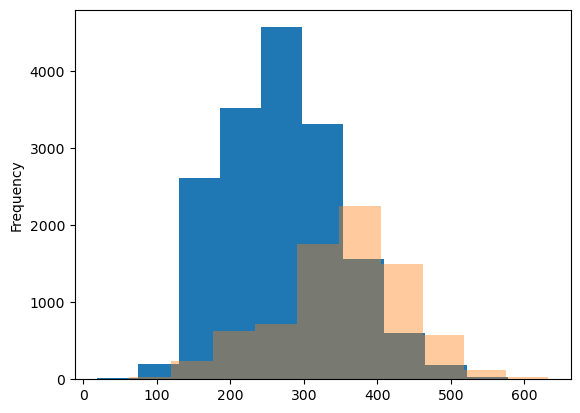

In [140]:
# code 10-14
#ヒストグラムの確認
train_val2.loc[train_val['y']==0,"duration"].plot(kind="hist")
train_val2.loc[train_val['y']==1,"duration"].plot(kind="hist",alpha=0.4)

#y=1の方が、durationが大きい傾向がやっぱりありそう

In [141]:
# code 10-15
#まず、さくっと学習できるようなlearn関数を定義する。
def learn(x,t,i):
    x_train,x_val,y_train,y_val = train_test_split(x,t,test_size=0.2,random_state=13)

    datas=[x_train,x_val,y_train,y_val]
    #不均衡データに対応できるように、class_weight引数も設定
    model = tree.DecisionTreeClassifier(random_state=i,max_depth=i,class_weight='balanced')
    model.fit(x_train,y_train)
    train_score=model.score(x_train,y_train)
    
    
    val_score=model.score(x_val,y_val)
    return train_score,val_score,model,datas

In [142]:
# code 10-16
t =train_val2['y']
x = train_val2.drop(str_col_name,axis=1)
x =x.drop(['id','y','day'],axis=1)

In [143]:
# code 10-17
#とりあえず、for文で様々な木の深さでの正解率を調べてみる
for i in range(1,15):
    s1,s2,model,datas = learn(x,t,i)
    print(i,s1,s2)

1 0.7436383185704777 0.7651034200286709
2 0.674517433823153 0.6807290600040958
3 0.7416926936664789 0.7569117345893918
4 0.6975065280835595 0.7034609870980955
5 0.7592545184578363 0.7653082121646528
6 0.7422047002201628 0.745033790702437
7 0.7774307511136143 0.7773909481875896
8 0.8082535456453842 0.7939791112021298
9 0.822180123905586 0.7999180831456072
10 0.843377195228099 0.8038091337292648
11 0.8587885924939839 0.7958222404259676
12 0.8744047923813425 0.7886545156665984
13 0.8949874558394347 0.792135981978292
14 0.9094260406533203 0.7911120212983821


In [144]:
# code 10-18
#テストデータでも調べる
test2 = test.copy()
isnull=test2['duration'].isnull()
model_tree=tree.DecisionTreeClassifier(random_state=10,max_depth=10,class_weight="balanced")
if isnull.sum()>0:
    temp_x=test2.loc[isnull,['housing_yes','loan_yes','age','marital_single','job_student']]
    pred_d = model_liner.predict(temp_x)
    test2.loc[isnull,'duration']=pred_d
x_test = test2.drop(str_col_name,axis=1)
x_test =x_test.drop(['id','y','day'],axis=1)
y_test = test['y']

model.score(x_test,y_test)

0.7814227792112053

In [131]:
#9章の最後より若干低下している

In [145]:
# code 10-19
#どのような間違い方をしているのか確認
s1,s2,model,datas = learn(x,t,9)

#訓練データでの予測結果と実際の値の2軸で個数集計flagがFalseならば、検証データで集計
def syuukei(model,datas,flag=False):
    if flag:
        pre=model.predict(datas[0])
        y_val=datas[2]
    else:
        pre=model.predict(datas[1])
        y_val=datas[3]
    data={
        "pred":pre,
        "true":y_val
    }
    tmp=pd.DataFrame(data)
    return tmp,pd.pivot_table(tmp,index="true",columns="pred",values="true",aggfunc=len)
tmp,a=syuukei(model,datas,False)
a

pred,0,1
true,,
0,2631,715
1,262,1275


In [152]:
# 正解率
(a.iloc[0,0]+a.iloc[1,1])/a.sum().sum()

0.7999180831456072

In [153]:
0.7999180831456072

0.7999180831456072

In [133]:
#訓練データと検証データの間違い型の傾向を調べる

<Axes: >

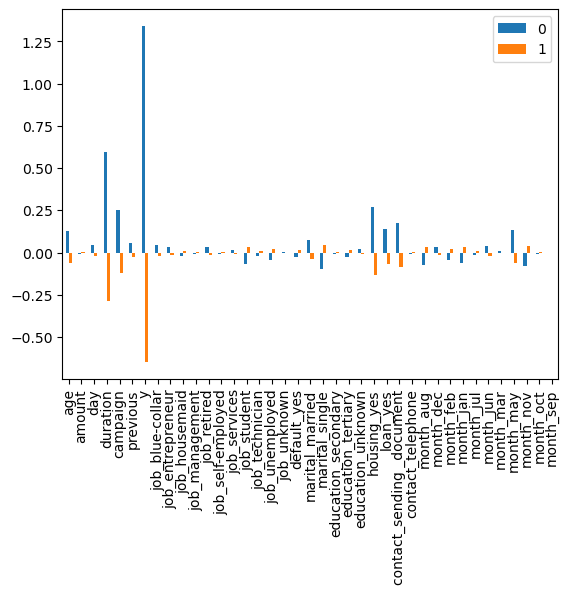

In [155]:
# code 10-
#値にばらつきが大きいので、標準化してもう一度グラフ化
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
tmp2=train_val2.drop(str_col_name,axis=1)
sc_data = sc.fit_transform(tmp2)
sc_df = pd.DataFrame(sc_data,columns=tmp2.columns,index=tmp2.index)

######挿入箇所#######
pre = model.predict(sc_df.drop(["id","day","y"],axis=1))
target = tmp2["y"]
true = (pre == target)
false = (pre!= target)
############

true_df=sc_df.loc[true]
false_df=sc_df.loc[false]
true_df
temp2=pd.concat([false_df.mean()["age":],true_df.mean()["age":]],axis=1)
temp2.plot(kind="bar")

<Axes: >

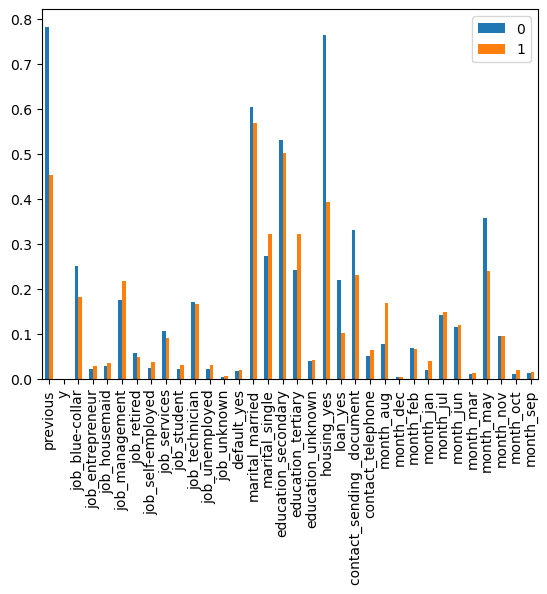

In [160]:
# code 10-
#値にばらつきが大きいので、標準化してもう一度グラフ化
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
tmp2=train_val2.drop(str_col_name,axis=1)
sc_data = sc.fit_transform(tmp2)
sc_df = pd.DataFrame(sc_data,columns=tmp2.columns,index=tmp2.index)

######挿入箇所#######
pre = model.predict(sc_df.drop(["id","day","y"],axis=1))
target = tmp2["y"]
# true = (pre == target)
# false = (pre!= target)
############
false=tmp.loc[(tmp['pred']==1)&(tmp['true']==0)].index
true=tmp.loc[(tmp['pred']==0)&(tmp['true']==0)].index

# true_df=sc_df.loc[true]
# false_df=sc_df.loc[false]
true_df=train_val2.loc[true]
false_df=train_val2.loc[false]
true_df
temp2=pd.concat([false_df.mean(numeric_only=True)["age":],true_df.mean(numeric_only=True)["age":]],axis=1)
temp2['previous':].plot(kind="bar")

In [161]:
# code 10-21
print(train_val2.groupby('loan')['y'].mean())
print(train_val2.groupby('housing')['y'].mean())

loan
no     0.300210
yes    0.424328
Name: y, dtype: float64
housing
no     0.217959
yes    0.400940
Name: y, dtype: float64


In [162]:
# code 10-22
train_val3=train_val2.copy()
train_val3['du*hou']=train_val3['duration']*train_val3['housing_yes']
train_val3['du*loan']=train_val3['duration']*train_val3['loan_yes']
train_val3['du*age']=train_val3['duration']*train_val3['age']

In [163]:
# code 10-23
t =train_val3['y']

monthcol=['month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep']
jobcol=['job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown']
x = train_val3.drop(str_col_name,axis=1)
x = x.drop(jobcol,axis=1)

x = x.drop(monthcol,axis=1)
x =x.drop(['id','y','day'],axis=1)
x.columns

Index(['age', 'amount', 'duration', 'campaign', 'previous', 'job_blue-collar',
       'default_yes', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'housing_yes', 'loan_yes', 'contact_sending _document',
       'contact_telephone', 'du*hou', 'du*loan', 'du*age'],
      dtype='object')

In [164]:
# code 10-24
#とりあえず、for文で様々な木の深さでの正解率を調べてみる
for i in range(5,15):
    s1,s2,model,datas = learn(x,t,i)
    print(i,s1,s2)

5 0.7585377092826788 0.7648986278926889
6 0.7422559008755312 0.7440098300225272
7 0.7811171983001383 0.7792340774114274
8 0.8061543187752803 0.7876305549866885
9 0.8267369822333726 0.801146835961499
10 0.8407147611489427 0.7978701617857874
11 0.8552045466181967 0.7911120212983821
12 0.8780912395678665 0.7988941224656974
13 0.8984691004044851 0.7982797460577514
14 0.9142901029133172 0.7978701617857874


In [165]:
# code 10-25
s1,s2,model,datas = learn(x,t,9)
tmp,a=syuukei(model,datas,False)
a

pred,0,1
true,,
0,2653,693
1,278,1259


In [166]:
# 正解率
(a.iloc[0,0]+a.iloc[1,1])/a.sum().sum()

0.801146835961499

In [167]:
0.801146835961499

0.801146835961499

In [116]:
# code 10-26
pd.Series(model.feature_importances_,index=x.columns)

age                          0.103160
amount                       0.019240
duration                     0.522389
campaign                     0.141550
previous                     0.012433
job_blue-collar              0.000689
default_yes                  0.001352
marital_married              0.001845
marital_single               0.001906
education_secondary          0.001850
education_tertiary           0.001379
education_unknown            0.000689
housing_yes                  0.020159
loan_yes                     0.018217
contact_sending _document    0.019211
contact_telephone            0.000493
du*hou                       0.034961
du*loan                      0.043253
du*age                       0.055223
dtype: float64

In [168]:
# code 10-27
i=9
model = tree.DecisionTreeClassifier(random_state=i,max_depth=i,class_weight="balanced")
model.fit(x,t)

DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=9)

In [169]:
# code 10-28
#テストデータでも調べる
test2 = test.copy()
isnull=test['duration'].isnull()
if isnull.sum()>0:
    temp_x=test2.loc[isnull,['housing_yes','loan_yes','age','marital_single','job_student']]
    pred_d = model_liner.predict(temp_x)
    test2.loc[isnull,'duration']=pred_d

test2['du*hou']=test2['duration']*test2['housing_yes']
test2['du*loan']=test2['duration']*test2['loan_yes']
test2['du*age']=test2['duration']*test2['age']

x_test = test2.drop(str_col_name,axis=1)
x_test = x_test.drop(jobcol,axis=1)
x_test = x_test.drop(monthcol,axis=1)
x_test =x_test.drop(['id','y','day'],axis=1)
y_test = test['y']
x_test.columns
model.score(x_test,y_test)

0.7913748617766311

In [ ]:
# 直観的に考えて、9章では、housingとloanで集計しており、今回の線形回帰では、それらの列も含まれているから、
# durationの性能はよりよくなるはず、でも全体のモデルの正解率は1%ほど低下している

#原因の仮説⇒ １．現状の線形回帰だと訓練&検証に過学習してしまい、テストデータにフィットしない。
                 #（そもそもテストデータではdurationがあまり関係していない？？）
#            2. 純粋な決定木の限界？

#            3. 現在考慮していない特徴量ももっとしっかりした方が良いのか？？

#次以降の章で仮説1,2について検討できるので、次章に続く。